# Projeto 1 - Ciência dos Dados

Nome: Beatriz de Carvalho Pacheco Lourenço

## Os projetos realizados pela Malala Fund estão impactando o número de meninas nas escolas?

## Explicação da hipótese e mecanismo

Com os recentes investimentos realizados pelo Malala Fund a partir de 2013, ano em que a fundo foi criada, a hipótese se fundamenta na possibilidade de perceber aumento no número de meninas matriculadas nas escolas em paises que receberam investimentos. Portanto o fundo estaria cumprindo seu objetivo inicial.


## Bases de dados usadas

https://data.worldbank.org/indicator/SE.SEC.ENRR.FE?view=chart

Os dados usados foram apenas os países e o número de meninas matriculadas no ensino secundário respectivos.

https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_Índice_de_Desenvolvimento_Humano

Usado como parâmetro para selecionar os países com IDH similar aos países ajudados pelo fundo.

https://en.unesco.org/themes/education-and-gender-equality/malala-fund

Algumas das ações realizadas através do fundo.

## Análise de dados

In [161]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import os
meu_diretorio = "/Users/beatriz/Documents/GitHub/CD_Projeto1"
os.chdir(meu_diretorio)

___

In [162]:
dados = pd.read_excel('school.xlsx')
dados.set_index('Country Name', inplace = True)

In [163]:
data_in = dados_in2.join(dados_in, how="inner")
data_out = dados_out2.join(dados_out, how="inner")

___

Seleção de apenas dos países onde o fundo atua.

In [164]:
p_in = ["Afghanistan", "Brazil", "India", "Nigeria", "Pakistan", "Syria"]
paises_in = []
for i in dados.index:
    if i in p_in:
        paises_in.append(True)
    else:
        paises_in.append(False)
        
dados['financiados'] = paises_in

Seleção de apenas os países com IDH parecido com os países selecionados ateriormente.

In [165]:
dados_out = dados.loc[["Sudan", "Venezuela, RB", "Timor-Leste", "Madagascar", "Rwanda", "Nepal", "Cameroon", "Lebanon"]]

In [166]:
dados_in = dados.loc[["Afghanistan", "Brazil", "India", "Nigeria", "Pakistan", "Syria", "Guatemala", "Nepal"]]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


___

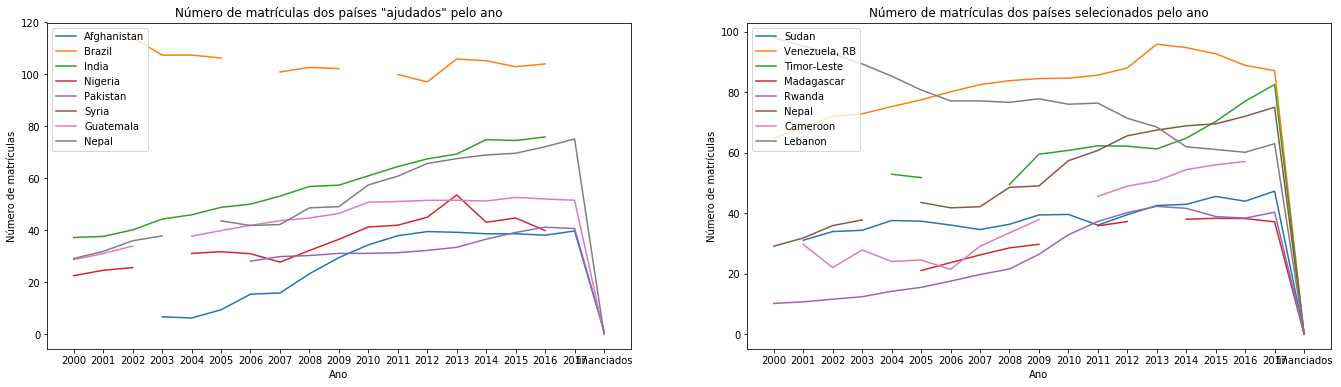

In [167]:
fig = plt.figure(figsize=(23,6))

plt.subplot(1,2,1)
dados_in2 = dados_in
dados_in2 = dados_in2.transpose()
plt.plot(dados_in2)
plt.title('Número de matrículas dos países "ajudados" pelo ano') 
plt.xlabel("Ano")
plt.ylabel("Número de matrículas")
plt.legend(["Afghanistan", "Brazil", "India", "Nigeria", "Pakistan", "Syria", "Guatemala", "Nepal"])

plt.subplot(1,2,2)
dados_out2 = dados_out
dados_out2 = dados_out2.transpose()
dados_out2
plt.plot(dados_out2)
plt.title('Número de matrículas dos países selecionados pelo ano') 
plt.xlabel("Ano")
plt.ylabel("Número de matrículas")
plt.legend(["Sudan", "Venezuela, RB", "Timor-Leste", "Madagascar", "Rwanda", "Nepal", "Cameroon", "Lebanon"])

plt.show()

Ao comparar ambos os gráficos é possível perceber que houve um crescimento em quase todos os países nos últimos anos.

___

Text(0, 0.5, 'Média de matrículas')

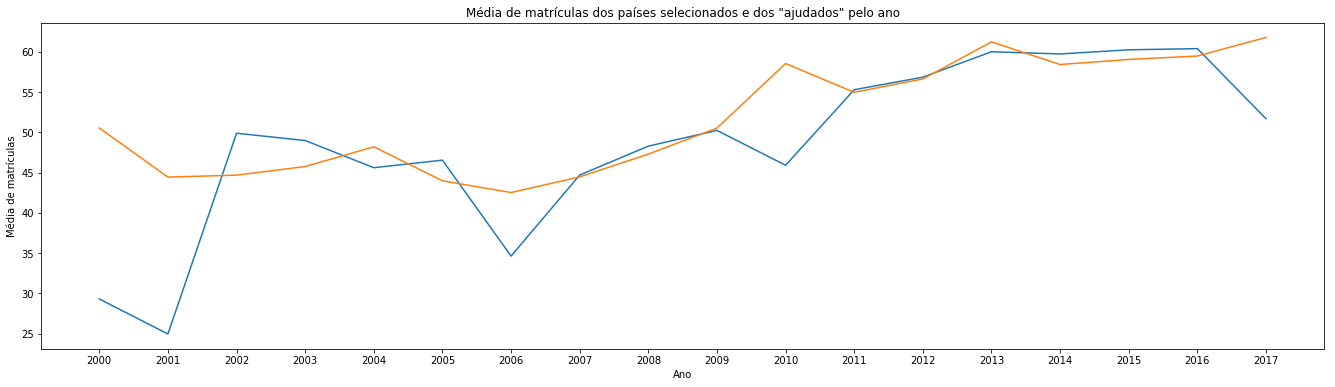

In [168]:
dados_in_m = dados_in.describe()
dados_in_m = dados_in_m.loc['mean']
dados_out_m = dados_out.describe()
dados_out_m = dados_out_m.loc['mean']

fig = plt.figure(figsize=(23,6))
plt.plot(dados_in_m) #laranja
plt.plot(dados_out_m) #azul
plt.title('Média de matrículas dos países selecionados e dos "ajudados" pelo ano') 
plt.xlabel("Ano")
plt.ylabel("Média de matrículas")

Por ser um gráfico da média pelo tempo, a linha que representa os países "ajudados" se tornou instável por causa da falta de dados em alguns anos o que, consequentemente, abaixou os valores dos anos afetados porém é possível perceber uma certa linearidade.

___

In [169]:
dados_in_s = dados.loc[["Afghanistan", "India", "Pakistan", "Nigeria", "Egypt"],:]
dados_in_s = dados_in_s.describe()
dados_in_s = dados_in_s.loc['mean']

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [170]:
dados_out_s = dados.loc[["Sudan", "Venezuela, RB", "Rwanda", "Nepal", "Lebanon", "Guatemala"]]
dados_out_s = dados_out_s.describe()
dados_out_s = dados_out_s.loc['mean']

Text(0, 0.5, 'Média de matrículas')

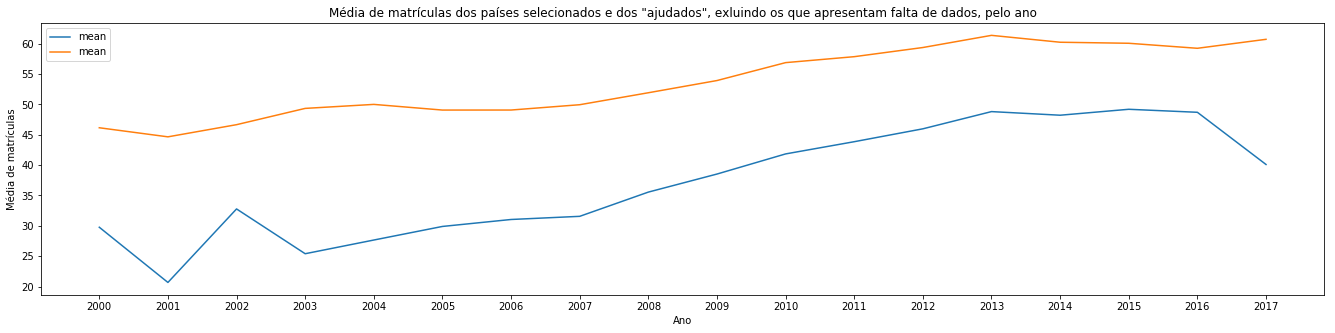

In [171]:
fig = plt.figure(figsize=(23,5))

plt.plot(dados_in_s) #azul
plt.plot(dados_out_s) #laranja
plt.legend()
plt.title('Média de matrículas dos países selecionados e dos "ajudados", exluindo os que apresentam falta de dados, pelo ano') 
plt.xlabel("Ano")
plt.ylabel("Média de matrículas")

Para que as médias fossem mais representativas da realidade, os países foram selecionados para sobrar apenas os países com mais dados disponíveis no período de tempo relevante a o projeto.
A partir do gráfico acima foi possível perceber que ambos os grupos de países apresentaram uma melhora em seus números, porém os escolhidos pelo fundo apresentam um aumento superior.

___

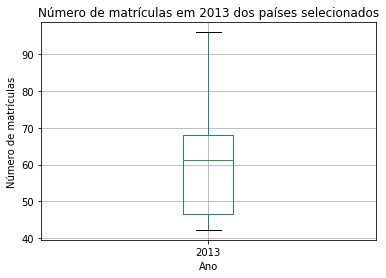

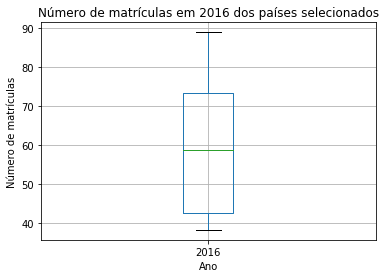

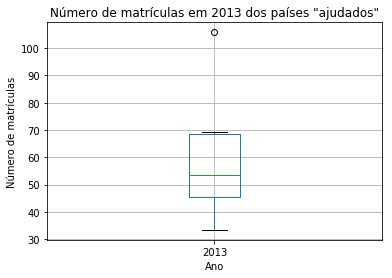

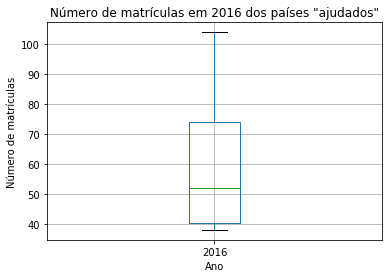

In [172]:
dados_out.boxplot(column="2013")
plt.title('Número de matrículas em 2013 dos países selecionados')
plt.xlabel("Ano")
plt.ylabel("Número de matrículas")
plt.show()

dados_out.boxplot(column="2016")
plt.title('Número de matrículas em 2016 dos países selecionados')
plt.xlabel("Ano")
plt.ylabel("Número de matrículas")
plt.show()

dados_in.boxplot(column="2013")
plt.title('Número de matrículas em 2013 dos países "ajudados"')
plt.xlabel("Ano")
plt.ylabel("Número de matrículas")
plt.show()

dados_in.boxplot(column="2016")
plt.title('Número de matrículas em 2016 dos países "ajudados"')
plt.xlabel("Ano")
plt.ylabel("Número de matrículas")
plt.show()

A partir dos quatro bloxplot acima, é possível perceber que os países representados sofreram uma leve queda no número de meninas matriculadas em 2016 comparado com o ano de fundação do fundo. Noss gráfcos dos países "selecionados" os limites, tanto o inferior quanto o superior, tiveram valores menores no ano mais recente, porém no caso dos países "ajudados" os limites permaneceram quase iguais.

## Conclusão

Os países analisados apresentaram melhoras a partir do primeiro ano do fundo, porém os países, no geral, apresentaram também um grande aumento no número de matrículas independentemente se receberam investimentos ou não, como tabém todos se comportaram de maneira diferente nos últimos dois anos analizados, sofreram uma leve queda. Esta estabilização pode ter sido causada por motivos externos ao contexto da análise, como conflitos não relacionados à educação. Portanto não é possível afirmar que o Malala Fund promoveu avanços apenas a partir dos dados analisados por causa de interferências na sociedade e por ainda ser um fundo muito recente.